# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset
df = pd.read_csv('/content/sample_data/Dataset_clustering.csv')

# Menampilkan 5 baris pertama dataset
df.head()

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,Debit,ATM,14.09,70,81.0,1.0,5112.21,3
1,Debit,ATM,376.24,68,141.0,1.0,13758.91,3
2,Debit,Online,126.29,19,56.0,1.0,1122.35,0
3,Debit,Online,184.50,26,25.0,1.0,8569.06,0
4,Credit,Online,13.45,26,198.0,1.0,7429.40,2


In [3]:
print(df.dtypes)

TransactionType         object
Channel                 object
TransactionAmount      float64
CustomerAge              int64
TransactionDuration    float64
LoginAttempts          float64
AccountBalance         float64
Cluster                  int64
dtype: object


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['TransactionType', 'Channel']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,1,0,14.09,70,81.0,1.0,5112.21,3
1,1,0,376.24,68,141.0,1.0,13758.91,3
2,1,2,126.29,19,56.0,1.0,1122.35,0
3,1,2,184.50,26,25.0,1.0,8569.06,0
4,0,2,13.45,26,198.0,1.0,7429.40,2


In [7]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,1,0,0.015317,0.838710,0.244828,1.0,0.336832,3
1,1,0,0.416400,0.806452,0.451724,1.0,0.918055,3
2,1,2,0.139579,0.016129,0.158621,1.0,0.068637,0
3,1,2,0.204047,0.129032,0.051724,1.0,0.569198,0
4,0,2,0.014608,0.129032,0.648276,1.0,0.492591,2


In [8]:
# Memisahkan fitur dan label
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Membagi data menjadi training set dan test set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data setelah splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1825, 7), (457, 7), (1825,), (457,))

In [9]:
y_train.value_counts()

,count
Cluster,
3,540
1,458
0,413
2,229
4,185


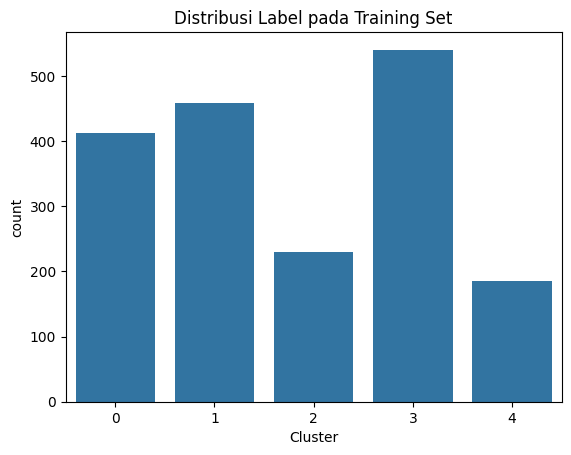

In [10]:
sns.countplot(x=y_train)
plt.title('Distribusi Label pada Training Set')
plt.show()

# **4. Membangun Model Klasifikasi**

## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### - Logistic Regression

In [12]:
# Inisialisasi model
model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Latih model dengan data latih
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

### - Random Forest

In [13]:
# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data latih yang sudah di-SMOTE
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### - Logistic Regression

In [14]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9584245076586433
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       109
           2       1.00      0.67      0.80        58
           3       1.00      1.00      1.00       142
           4       0.71      1.00      0.83        46

    accuracy                           0.96       457
   macro avg       0.94      0.93      0.93       457
weighted avg       0.97      0.96      0.96       457



Kesimpulan:

1. Akurasi Model

  - Akurasi model mencapai 95.84%, yang menunjukkan bahwa model mampu melakukan klasifikasi dengan sangat baik pada dataset uji.

2. Evaluasi dengan Precision, Recall, dan F1-Score

  - Kelas 0, 1, dan 3 memiliki precision, recall, dan F1-score sempurna (1.00), maka model sangat baik dalam mengidentifikasi kategori ini tanpa kesalahan.

  - Kelas 2 memiliki recall 0.67, yang berarti model hanya berhasil mengidentifikasi 67% dari total sampel kelas. Precision tetap tinggi (1.00), menunjukkan bahwa prediksi untuk kelas ini selalu benar tetapi banyak sampel dari kelas 2 yang tidak terdeteksi dengan benar.

  - Kelas 4 memiliki precision 0.71 dan recall 1.00, yang berarti model menangkap semua sampel dari kelas ini tetapi juga menghasilkan beberapa false positives.

3. Confusion Matrix (Dapat Dibuat untuk Pemahaman Lebih Jelas)

  - Dari laporan ini, terlihat bahwa kelas 2 dan kelas 4 adalah yang paling bermasalah karena mereka memiliki nilai recall dan precision yang lebih rendah dibandingkan kelas lainnya.

### - Random Forest

In [15]:
# Prediksi pada data uji
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))

Akurasi: 1.0
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00       142
           4       1.00      1.00      1.00        46

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



Kesimpulan:

1. Akurasi Model
    - Akurasi model mencapai 100%, yang berarti model mampu mengklasifikasikan seluruh data uji dengan benar.

2. Evaluasi dengan Precision, Recall, dan F1-Score
    - terlihat bahwa semua metrik evaluasi (precision, recall, dan F1-score) mencapai nilai sempurna (1.00) untuk setiap kelas. Ini menunjukkan bahwa model tidak membuat kesalahan dalam prediksi.
    - Model Random Forest berhasil mengatasi masalah ini, sehingga semua kelas dapat diklasifikasikan dengan sempurna.

3. Confusion Matrix (Opsional untuk Verifikasi)
    - Meskipun laporan klasifikasi menunjukkan hasil sempurna, tetap disarankan untuk membuat Confusion Matrix guna memastikan bahwa tidak ada kesalahan klasifikasi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

### 2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?

1. Model Logistic Regression

  a. Kelemahan yang teridentifikasi:

      Precision dan Recall rendah pada kelas tertentu:

      - Kelas 2 memiliki recall 0.67, artinya model gagal mengenali sekitar 33% dari total sampel di kelas ini.

      - Kelas 4 memiliki precision 0.71, yang berarti model memprediksi kelas ini dengan beberapa kesalahan (false positives).

  b. Kemungkinan underfitting:

      - Model tidak bisa sepenuhnya menangkap pola data kompleks, terutama untuk kelas minoritas seperti kelas 2 dan kelas 4.

2. Model Random Forest

   Kelemahan yang teridentifikasi:

      Kemungkinan Overfitting:

      - Model mencapai akurasi 100% di data uji, yang jarang terjadi dalam kasus real-world.
      - Bisa jadi model terlalu "mengingat" data latih, bukan benar-benar memahami pola generalisasi.
      - Kinerja bisa lebih lambat dibanding Logistic Regression, terutama jika jumlah pohon dalam Random Forest terlalu banyak.
      - Butuh lebih banyak penyimpanan dan komputasi, karena model lebih kompleks dibanding Logistic Regression.

In [16]:
df.to_csv("Dataset_inisiasi.csv", index=False)
print("Data berhasil diekspor ke Dataset_inisiasi.csv")

Data berhasil diekspor ke Dataset_inisiasi.csv
